In [ ]:
#|hide
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
from nbdev.showdoc import *

# Configure environment
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false' # Tells Jax not to hog all of the memory to this process.

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.auto import tqdm, trange

## project specifics
import diffusion_curvature
import pygsp
import jax
import jax.numpy as jnp
jax.devices()

from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core import *
from diffusion_curvature.utils import *
from diffusion_curvature.comparison_space import *

%load_ext autoreload
%autoreload 2

# 7 Experiments with Diffusion Ricci Curvature
> Testing the bounds of the method

**Hypothesis**: Stuff will happen

First here's an example usage:

In [ ]:
show_doc(DiffusionRicciCurvature)

---

### torus

>      torus (n=2000, c=2, a=1, noise=None, seed=None, use_guide_points=False)

Sample `n` data points on a torus. Modified from [tadasets.shapes — TaDAsets 0.1.0 documentation](https://tadasets.scikit-tda.org/en/latest/_modules/tadasets/shapes.html#torus)
Uses rejection sampling.

In addition to the randomly generated points, a few constant points have been added.
The 0th point is on the outer rim, in a region of high positive curvature. The 1st point is in the inside, in a region of negative curvature, and the 2nd point is on the top, where the curvature should be closer to zero.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n | int | 2000 | Number of data points in shape. |
| c | int | 2 | Distance from center to center of tube. |
| a | int | 1 | Radius of tube. |
| noise | NoneType | None |  |
| seed | NoneType | None | Seed for random state. |
| use_guide_points | bool | False |  |

In [ ]:
from diffusion_curvature.ricci import DiffusionRicciCurvature
import graphtools

In [ ]:
X_torus, ks_torus = torus(200)
G = graphtools.Graph(X_torus, anisotropy=1, knn=15, decay=None).to_pygsp()
A = jnp.array(G.W.todense(), dtype=jnp.float32,)

In [ ]:
DRC = DiffusionRicciCurvature()
R = DRC.fit_transform(A, 25)

  0%|          | 0/200 [00:00<?, ?it/s]

[[0.        0.5322987 0.        ... 0.        0.        0.       ]
 [0.5322986 0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


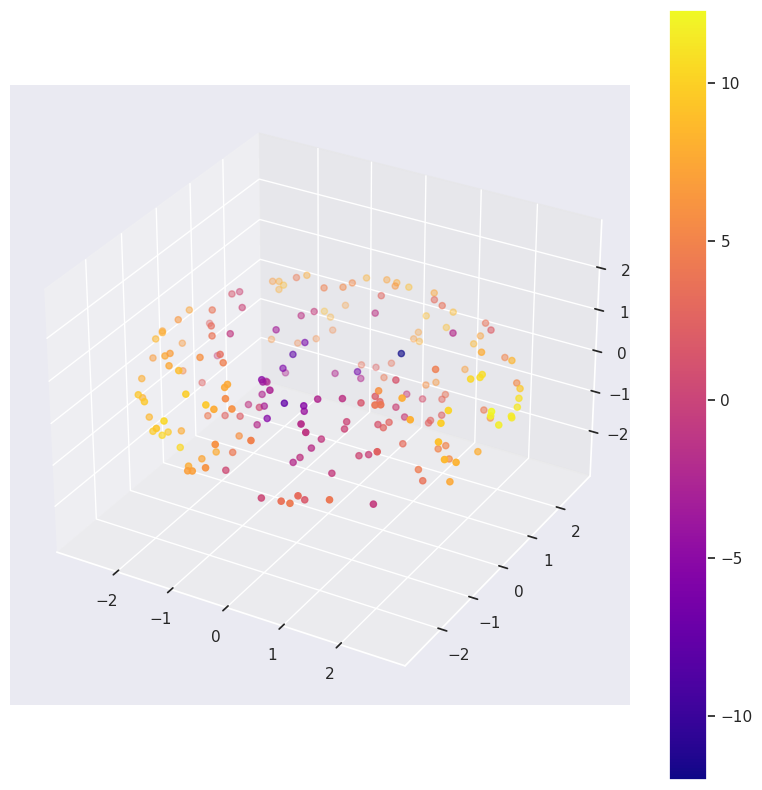

In [ ]:
plot_3d(X_torus, DRC.ks, colorbar=True)

# Machinery

# Results

## Example Usage

# Conclusion